In [1]:
# inline plotting instead of popping out
%matplotlib inline

# python 3.6.8
import os, itertools, csv

from IPython.display import Image
from IPython.display import display

# numpy  1.19.5
import numpy as np

# pandas  0.25.3
import pandas as pd

# scikit-learn  0.22
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_moons
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVC

# matplotlib  3.1.2
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
plt = matplotlib.pyplot


# Make output directory
if not os.path.exists("output/") : os.mkdir("output/")

In [2]:
df = pd.read_csv('./B_data_2022.csv')

display(df.head(10))
df.shape

,date,team1,winrate1,totalgame1,killspg1,assistspg1,deathpg1,ckpg1,dragonspg1,towerspg1,...,assistspg2,deathpg2,ckpg2,dragonspg2,towerspg2,dmgpg2,visionscorepg2,goldpg2,CSpg2,result
0,2017-01-10 15:44:06,oe:team:47ae4f5f4aea5a7a0ab0b9778844cc2,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2017-01-10 17:55:36,oe:team:fb999a0470494c0967ddc6b7121f54c,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2017-01-10 18:57:51,oe:team:e31c6dcc465e0b94500ef023f42cdc1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2017-01-11 15:33:10,oe:team:47ae4f5f4aea5a7a0ab0b9778844cc2,1.0,1,14.0,41.0,3.0,11.0,2.0,11.0,...,40.0,3.0,16.0,1.0,11.0,45993.0,0.0,52486.0,0.0,0
4,2017-01-11 15:46:32,oe:team:92ebcf3407842256ee7954c5e2390a8,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,2017-01-11 16:44:20,oe:team:266f28c813f67d6f43897ef089f6cf6,0.0,1,3.0,4.0,19.0,-16.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,2017-01-11 17:53:03,oe:team:08775d48df080a9fd0661fcb1441604,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,24.0,-17.0,0.0,0.0,44820.0,0.0,52241.0,0.0,0
7,2017-01-12 15:22:04,oe:team:47bf9c96596e56abf93d96d5373938f,1.0,1,21.0,51.0,12.0,9.0,3.0,11.0,...,7.0,14.0,-11.0,1.0,4.0,45561.0,0.0,50449.0,0.0,0
8,2017-01-12 17:18:16,oe:team:47ae4f5f4aea5a7a0ab0b9778844cc2,1.0,2,14.0,39.0,4.5,9.5,2.5,11.0,...,18.0,20.0,-12.5,0.5,2.5,73676.5,0.0,56843.5,0.0,0
9,2017-01-12 18:11:39,oe:team:92ebcf3407842256ee7954c5e2390a8,1.0,1,25.0,57.0,17.0,8.0,4.0,9.0,...,45.0,11.0,8.0,5.0,11.0,114560.0,0.0,82920.0,0.0,1


(54256, 28)

In [3]:
# label_le = LabelEncoder()
# df['result'] = label_le.fit_transform(df['result'].values)

# #processing catregory
# label_category = LabelEncoder()
# category_features = df.columns[0:27]
# categories = []

# for i in category_features:
#   df[i] = label_category.fit_transform(df[i].values)
#   class_list = label_category.classes_.tolist()

#   # replace '?' with 'NaN'
#   if ' ' in class_list:
#       idx = class_list.index(' ')
#       df[i] = df[i].replace(idx, np.nan)
  
#   categories.append(np.arange(len(class_list)))

# display(df.head(10))

In [4]:
X = df.drop(['date', 'team1', 'team2', 'CSpg1', 'CSpg2', 'result'], axis=1).values
Y = df['result'].values

display(X.shape)

(54256, 22)

In [5]:
display(df.isnull().sum())

print(df.shape)

# drop rows with missing values
df_drop_row = df.dropna()
print(df_drop_row.shape)

date              0
team1             0
winrate1          0
totalgame1        0
killspg1          0
assistspg1        0
deathpg1          0
ckpg1             0
dragonspg1        0
towerspg1         0
dmgpg1            0
visionscorepg1    0
goldpg1           0
CSpg1             0
team2             0
winrate2          0
totalgame2        0
killspg2          0
assistspg2        0
deathpg2          0
ckpg2             0
dragonspg2        0
towerspg2         0
dmgpg2            0
visionscorepg2    0
goldpg2           0
CSpg2             0
result            0
dtype: int64

(54256, 28)
(54256, 28)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

pipe_knn = Pipeline([
    ("imr", SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')),
    ("scl", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors = 10, p = 2, metric = "minkowski"))
])

pipe_svm = Pipeline([
    ("imr", SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')),
    ("scl", StandardScaler()),
    ('clf', SVC(kernel = "rbf", random_state = 0, gamma = 0.001, C = 100.0))
])

# use the pipeline model to train
pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('[KNN]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print('\n[SVC]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

[KNN]
Misclassified samples: 4304
Accuracy: 0.6034

[SVC]
Misclassified samples: 4009
Accuracy: 0.6306


In [7]:
df1 = df.drop(['date', 'team1', 'team2', 'CSpg1', 'CSpg2', 'result'], axis=1)

Text(0.5, 0, 'Permutation Importance')

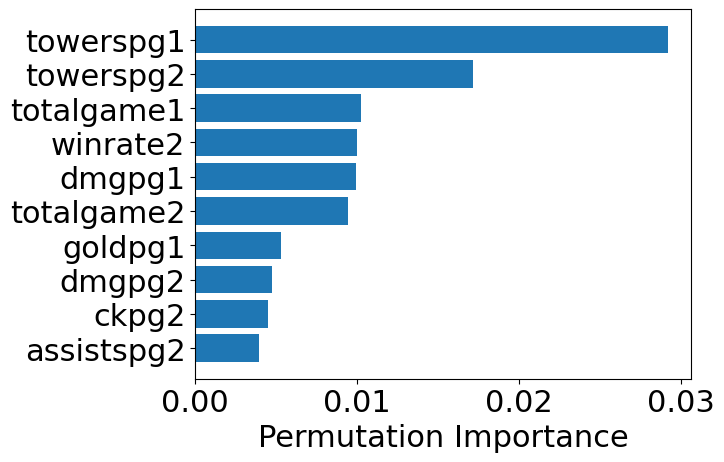

In [9]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(pipe_svm, X_test, y_test)


sorted_idx = perm_importance.importances_mean.argsort()
plt.barh((df1.columns[sorted_idx])[12:25].tolist(), perm_importance.importances_mean[sorted_idx][12:25])
plt.xlabel("Permutation Importance")

In [7]:
# inline plotting instead of popping out
%matplotlib inline

# python 3.8.8
import os, itertools, csv

from IPython.display import Image
from IPython.display import display

# numpy  1.22.4
import numpy as np

# pandas  1.2.4
import pandas as pd

# scikit-learn  0.24.1
from sklearn import datasets
load_iris = datasets.load_iris
make_moons = datasets.make_moons
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve, auc
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# matplotlib  3.3.4
import matplotlib.pyplot as plt

# Make output directory
if not os.path.exists("output/") : os.mkdir("output/")
    
import warnings
warnings.filterwarnings("ignore")

In [8]:
pipe1 = Pipeline([['sc', StandardScaler()], ['clf', LogisticRegression(C = 10, random_state = 0, solver = "liblinear")]])
pipe2 = Pipeline([['clf', DecisionTreeClassifier(max_depth = None, random_state = 0)]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', KNeighborsClassifier(n_neighbors = 5)]])

clf_labels = ['LogisticRegression', 'DecisionTree', 'KNN']

best_vt, best_w, best_score = None, (), -1
for a, b, c in list(itertools.permutations(range(0,3))):
    clf = VotingClassifier(estimators=[('LogisticRegression', pipe1), ('DecisionTree', pipe2), ('KNN', pipe3)], 
                           voting='soft', weights=[a,b,c])
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)
    print('%s: %.3f (+/- %.3f)' % ((a,b,c), scores.mean(), scores.std()))
    if best_score < scores.mean():
        best_vt, best_w, best_score = clf, (a, b, c), scores.mean()

(0, 1, 2): 0.584 (+/- 0.007)
(0, 2, 1): 0.555 (+/- 0.010)
(1, 0, 2): 0.592 (+/- 0.006)
(1, 2, 0): 0.556 (+/- 0.011)
(2, 0, 1): 0.618 (+/- 0.006)
(2, 1, 0): 0.568 (+/- 0.011)


In [9]:
print("[Voting]")
print('\nBest %s: %.3f' % (best_w, best_score))
voting = best_vt.fit(X_train, y_train)
y_train_pred = voting.predict(X_train)
y_test_pred = voting.predict(X_test)
voting_train = accuracy_score(y_train, y_train_pred) 
voting_test = accuracy_score(y_test, y_test_pred)
print("Train Acc:", voting_train)
print("Test  Acc:", voting_test)

[Voting]

Best (2, 0, 1): 0.618
Train Acc: 0.6958805640033177
Test  Acc: 0.6212679690379653


In [10]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, 
                        max_samples=0.7, bootstrap=True,
                        max_features=1.0, bootstrap_features=False, 
                        n_jobs=1, random_state=1)

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('[Bagging]')
print('accuracy-train = %.3f, accuracy-test = %.3f' % (bag_train, bag_test))

[Bagging]
accuracy-train = 0.992, accuracy-test = 0.626


In [11]:
df1 = df.drop(['date', 'team1', 'team2', 'CSpg1', 'CSpg2', 'result'], axis=1)

<BarContainer object of 10 artists>

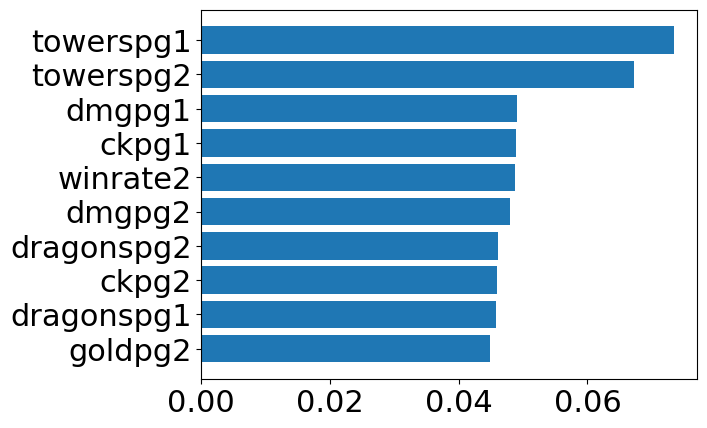

In [13]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bag.estimators_
], axis=0)
sorted_idx = feature_importances.argsort()

plt.barh((df1.columns[sorted_idx])[12:25].tolist(), feature_importances[sorted_idx][12:25])

In [15]:
ada_pipeline = Pipeline(steps = [("clf", AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))])

params_grid = {
    'clf__base_estimator__max_depth': [5, 7, 9, 10, 20],
    'clf__n_estimators': [1, 10, 50, 100, 150, 200]
}

ada_grid = GridSearchCV(
    estimator = ada_pipeline, 
    param_grid = params_grid, 
    scoring = "accuracy",
    n_jobs = 2,
    cv = 5
)

ada_grid.fit(X_train, y_train)

y_train_pred = ada_grid.predict(X_train)
y_test_pred = ada_grid.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print("[Adaboost_BaseTree_MaxDepth=Best]")
print("Train Acc:", ada_train)
print("Test  Acc:", ada_test)
print(ada_grid.best_params_)

[Adaboost_BaseTree_MaxDepth=Best]
Train Acc: 0.627292415445581
Test  Acc: 0.6236638407666789
{'clf__base_estimator__max_depth': 5, 'clf__n_estimators': 1}
